In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [4]:
output_folder = r'C:\Users\Vivek.Sujan\Desktop\DS Assignment\Fuzzy K means clustering $0 and non $0 Premium\Non $0 Premium Output Files'

In [5]:
df = pd.read_csv(r"DS_Data.csv")

In [6]:
df1 = df.copy(deep = True)

In [7]:
df1 = df1[df1['Special Needs Plan Type_Non-SNP'] == 1]

In [8]:
df1 = df1[df1['$0_Premium'] == 1] #lets apply kmeans on only $0 premium amount

In [9]:
# Dropping the enrollments columns and the columns and bringing the data to a single bid_id level
df1 = df1.drop(columns = ['Special Needs Plan Type_Dual-Eligible','Special Needs Plan Type_Non-SNP','$0_Premium',
                          'State','County','PreviousYearEnr12','CurrentYearEnr1','CurrentYearEnr2'])

In [10]:
df1 = df1.drop_duplicates(subset = ['bid_id'])

In [11]:
df2 = df1.drop(columns = ['bid_id','description','Year',
                    'Final Parent Organisation Name','key','Count','pbp_a_dsnp_zerodollar',
                    'pbp_a_snp_state_cvg_yn','Plan Type','DSNP_Count','dep_var'])

In [12]:
df2

,Monthly_Consolidated_Premium_C_D,Grand_Total_OOPC,Annual_Drug_Deductible,health_deductible,Add_Cvrg_Offrd_in_Gap,In_network_MOOP_Amount,star_rating,PartD,Type of Medicare Health Plan_Cost,Type of Medicare Health Plan_HMO,...,Soc_need_ben_Cov_amt_ssbci,Transportation_Cov_amt_ssbci,star_rating_4_and_above,pbp_b13b_otc_coverage,b16a_Prev_Dental_Coverage,b16b_Comp_Dental_Coverage,b17a_Eye_Exam_Coverage,b17b_Eyewear_Coverage,b18a_Hearing_Exams_Coverage,b18b_Hearing_Aids_Coverage
0,0.0,270.105421,100,0,1,7350.0,4.0,1,0,0.0,...,0,0,1,0.0,0,0,0,100.0,0.0,350.0
36,0.0,248.479756,0,0,1,5500.0,4.0,1,0,0.0,...,0,0,1,336.0,69,1868,69,373.0,43.0,1204.0
211,0.0,89.313181,1505,5000,0,0.0,4.0,0,0,0.0,...,0,0,1,0.0,0,0,0,0.0,0.0,0.0
278,0.0,89.313181,1505,8000,0,0.0,4.0,0,0,0.0,...,0,0,1,0.0,0,0,0,0.0,0.0,0.0
345,0.0,191.317294,0,0,1,4900.0,4.5,1,0,0.0,...,0,0,1,280.0,533,1666,0,200.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118539,0.0,137.921377,1505,0,0,6700.0,3.5,0,0,0.0,...,0,0,0,200.0,266,833,0,150.0,0.0,0.0
118621,0.0,195.853313,0,0,1,2500.0,4.0,1,0,1.0,...,0,0,1,220.0,0,0,0,300.0,0.0,1000.0
118622,0.0,193.127866,0,0,1,2500.0,4.0,1,0,1.0,...,0,0,1,220.0,0,0,0,300.0,0.0,1000.0
118643,0.0,256.337808,0,0,1,4900.0,4.0,1,0,1.0,...,0,0,1,160.0,366,1145,0,400.0,0.0,500.0


In [13]:
scaler = StandardScaler()
df3 = scaler.fit_transform(df2)
df_scaled = pd.DataFrame(df3,columns = df2.columns)

In [14]:
# scaler = MinMaxScaler()
# df3 = scaler.fit_transform(df2)
# df_scaled = pd.DataFrame(df3,columns = df2.columns)

In [15]:
df_scaled

,Monthly_Consolidated_Premium_C_D,Grand_Total_OOPC,Annual_Drug_Deductible,health_deductible,Add_Cvrg_Offrd_in_Gap,In_network_MOOP_Amount,star_rating,PartD,Type of Medicare Health Plan_Cost,Type of Medicare Health Plan_HMO,...,Soc_need_ben_Cov_amt_ssbci,Transportation_Cov_amt_ssbci,star_rating_4_and_above,pbp_b13b_otc_coverage,b16a_Prev_Dental_Coverage,b16b_Comp_Dental_Coverage,b17a_Eye_Exam_Coverage,b17b_Eyewear_Coverage,b18a_Hearing_Exams_Coverage,b18b_Hearing_Aids_Coverage
0,0.0,1.254329,-0.317535,-0.199890,0.776929,1.316086,0.170673,0.392812,-0.032042,-0.918837,...,-0.188981,-0.181505,0.780327,-1.333254,-0.500616,-0.727079,-0.420215,-0.804814,-0.252608,-0.230483
1,0.0,0.809114,-0.516268,-0.199890,0.776929,0.298149,0.170673,0.392812,-0.032042,-0.918837,...,-0.188981,-0.181505,0.780327,0.144314,-0.389306,0.240393,1.172998,1.463903,1.032448,0.975823
2,0.0,-2.467702,2.474665,17.278308,-1.287119,-2.728152,0.170673,-2.545745,-0.032042,-0.918837,...,-0.188981,-0.181505,0.780327,-1.333254,-0.500616,-0.727079,-0.420215,-1.635845,-0.252608,-0.724871
3,0.0,-2.467702,2.474665,27.765226,-1.287119,-2.728152,0.170673,-2.545745,-0.032042,-0.918837,...,-0.188981,-0.181505,0.780327,-1.333254,-0.500616,-0.727079,-0.420215,-1.635845,-0.252608,-0.724871
4,0.0,-0.367709,-0.516268,-0.199890,0.776929,-0.031993,0.944653,0.392812,-0.032042,-0.918837,...,-0.188981,-0.181505,0.780327,-0.101947,0.359210,0.135773,-0.420215,0.026218,-0.252608,-0.724871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,0.0,-1.466989,2.474665,-0.199890,-1.287119,0.958432,-0.603308,-2.545745,-0.032042,-0.918837,...,-0.188981,-0.181505,-1.281513,-0.453749,-0.071509,-0.295653,-0.420215,-0.389298,-0.252608,-0.724871
2921,0.0,-0.274325,-0.516268,-0.199890,0.776929,-1.352561,0.170673,0.392812,-0.032042,1.088332,...,-0.188981,-0.181505,0.780327,-0.365799,-0.500616,-0.727079,-0.420215,0.857250,-0.252608,0.687666
2922,0.0,-0.330434,-0.516268,-0.199890,0.776929,-1.352561,0.170673,0.392812,-0.032042,1.088332,...,-0.188981,-0.181505,0.780327,-0.365799,-0.500616,-0.727079,-0.420215,0.857250,-0.252608,0.687666
2923,0.0,0.970890,-0.516268,-0.199890,0.776929,-0.031993,0.170673,0.392812,-0.032042,1.088332,...,-0.188981,-0.181505,0.780327,-0.629650,0.089809,-0.134062,-0.420215,1.688281,-0.252608,-0.018603


# Assigning the weights

In [13]:
bene_weight = pd.read_excel(r"Benefits Weightages File_zero.xlsx")

In [14]:
bene_weight_new = bene_weight[~bene_weight['Benefit_column'].isin(['PreviousYearEnr12',
                                             'CurrentYearEnr1',
                                             'CurrentYearEnr2',
                                             'Special Needs Plan Type_Non-SNP',
                                             'Special Needs Plan Type_Dual-Eligible','$0_Premium'])]

In [15]:
# bene_weight_new = 

In [16]:
# bene_weight_new['scaled_weight'] = bene_weight_new['Weights_New']/np.sum(bene_weight_new['Weights_New'])#make changes here

In [17]:
bene_weight_new['scaled_weight'] = bene_weight_new['Weights_New'] #* bene_weight_new['Directionality']

In [18]:
# def assign_weights(data, weights):
#     weighted_data = data * weights
#     return weighted_data

In [19]:
weighted_data = df_scaled.copy(deep=True)

In [20]:
for index, row in bene_weight_new.iterrows():
    col_name = bene_weight_new.at[index,'Benefit_column']
    weight = bene_weight_new.at[index,'scaled_weight']
    weighted_data[col_name] = weighted_data[col_name] * weight

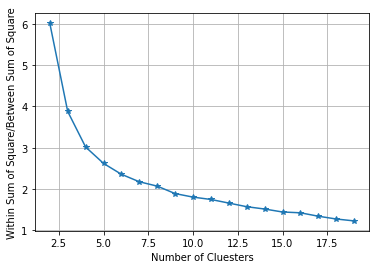

In [21]:
X = weighted_data.to_numpy()



#Squared eucliden distance
TSS = 0
for i in range(X.shape[1]):
    mean = np.mean(X[:,i],axis =0)
    x = X[:,i]
    squared_distance = np.sum((x-mean)**2,axis=0)
    TSS = TSS + squared_distance

#calulating the inertia 
inertia = []
k_values = range(2,20)
for k in k_values:
    kmeans = KMeans(n_clusters=k,init='k-means++',random_state=42)
    kmeans.fit(X)
    between_ss = TSS - (kmeans.inertia_)
    inertia.append((kmeans.inertia_)/between_ss)

plt.plot(k_values,inertia,marker='*')
plt.xlabel('Number of Cluesters')
plt.ylabel('Within Sum of Square/Between Sum of Square')
plt.grid()
plt.show()

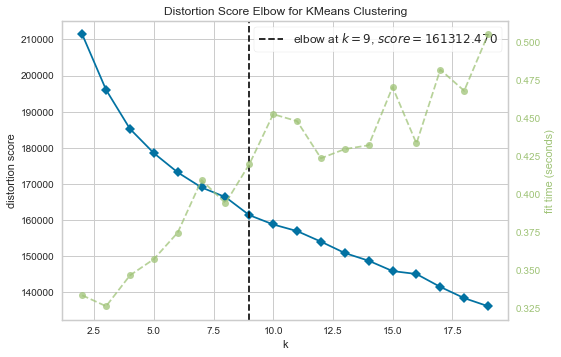

9

In [22]:
X = weighted_data.to_numpy()
from yellowbrick.cluster import KElbowVisualizer

# For the Elbow Method, the default metric is 'distortion'.

visualizer = KElbowVisualizer(KMeans(random_state=42), k=(2,20))

 

# Fit the visualizer to the data

visualizer.fit(X)

 

# Show the plot

visualizer.show()

elbow_point = visualizer.elbow_value_

elbow_point

# So we have got effective clusters as 8

In [23]:
very_high_benefits = ['Monthly_Consolidated_Premium_C_D',
                     'Grand_Total_OOPC',
                     'Annual_Drug_Deductible',
                     'health_deductible',
                     'Add_Cvrg_Offrd_in_Gap',
                     'In_network_MOOP_Amount',
                     'star_rating',
                     'PartD',
                     'PreviousYearEnr12',
                     'CurrentYearEnr1',
                     'CurrentYearEnr2',
                     'Net Enrollments', 
                     'Type of Medicare Health Plan_Cost',
                     'Type of Medicare Health Plan_HMO',
                     'Type of Medicare Health Plan_HMO_POS', 
                     'Type of Medicare Health Plan_MMP',
                     'Type of Medicare Health Plan_MSA *',
                     'Type of Medicare Health Plan_PFFS',
                     'Type of Medicare Health Plan_PPO',
                     'Drug_Benefit_AE',
                     'Drug_Benefit_BA',
                     'Drug_Benefit_DS',
                     'Drug_Benefit_EA',
                     'b1a_inpat_acute',
                     'b7a_Primary_Care_Physician',
                     'b7d_Physician_Specialists',
                     'PartD_Premium',
                     'PartC_Premium',
                     'Part_B_Reduction',
                     'b7j_Additional_Telehealth',
                     'b16a_Prev_Dental_mandatory',
#                      '$0_Premium',
                     'star_rating_4_and_above',
                     'b16a_Prev_Dental_Coverage']

In [24]:
all_benefits = list(df_scaled.columns) +['PreviousYearEnr12',
                                         'CurrentYearEnr1',
                                         'CurrentYearEnr2',
                                         'Net Enrollments']

In [25]:
X = weighted_data.to_numpy()
kmeans = KMeans(n_clusters=9, random_state=42) # taking clusters as 9, which we obtained from clusetring analysis
kmeans.fit(X)

# Get the cluster assignments for each data point
labels = kmeans.labels_

# add cluster assignments back to data
df2['clusters']=labels

In [26]:
new_veryhigh = ['Monthly_Consolidated_Premium_C_D',
                     'Grand_Total_OOPC',
                     'Annual_Drug_Deductible',
                     'health_deductible',
                     'Add_Cvrg_Offrd_in_Gap',
                     'In_network_MOOP_Amount',
                     'star_rating',
                     'PartD',
                     'Type of Medicare Health Plan_Cost',
                     'Type of Medicare Health Plan_HMO',
                     'Type of Medicare Health Plan_HMO_POS',
                     'Type of Medicare Health Plan_MMP',
                     'Type of Medicare Health Plan_MSA *',
                     'Type of Medicare Health Plan_PFFS',
                     'Type of Medicare Health Plan_PPO',
                     'Drug_Benefit_AE',
                     'Drug_Benefit_BA',
                     'Drug_Benefit_DS',
                     'Drug_Benefit_EA',
                     'b1a_inpat_acute',
                     'b7a_Primary_Care_Physician',
                     'b7d_Physician_Specialists',
                     'PartD_Premium',
                     'PartC_Premium',
                     'Part_B_Reduction',
                     'b7j_Additional_Telehealth',
                     'b16a_Prev_Dental_mandatory',
#                      '$0_Premium',
                     'star_rating_4_and_above',
                     'b16a_Prev_Dental_Coverage']

In [27]:
clust_res_wo_enrollment = df2.groupby(['clusters'], as_index=False, sort=True)[new_veryhigh].mean()
clust_res_wo_enrollment

,clusters,Monthly_Consolidated_Premium_C_D,Grand_Total_OOPC,Annual_Drug_Deductible,health_deductible,Add_Cvrg_Offrd_in_Gap,In_network_MOOP_Amount,star_rating,PartD,Type of Medicare Health Plan_Cost,...,b1a_inpat_acute,b7a_Primary_Care_Physician,b7d_Physician_Specialists,PartD_Premium,PartC_Premium,Part_B_Reduction,b7j_Additional_Telehealth,b16a_Prev_Dental_mandatory,star_rating_4_and_above,b16a_Prev_Dental_Coverage
0,0,0.0,233.880728,74.828571,121.060000,0.757143,5809.651429,3.354286,1.0,0.00000,...,28.220873,0.311437,16.630052,0.0,0.0,6.754286,10.847812,1.450131,0.162857,301.788571
1,1,0.0,211.348404,28.333333,45.438596,0.950877,4857.894737,3.971930,1.0,0.00000,...,21.283860,0.167656,14.298789,0.0,0.0,1.561404,6.191010,0.978543,0.607018,356.743860
2,2,0.0,170.067261,1.422319,0.000000,0.932166,2692.892779,4.012035,1.0,0.00000,...,8.301611,0.070575,3.531590,0.0,0.0,26.059081,28.982545,2.360522,0.761488,206.437637
3,3,0.0,239.891457,80.043371,13.534077,0.560099,5349.910781,3.848823,1.0,0.00000,...,25.543062,0.484543,15.016202,0.0,0.0,16.185874,37.870602,4.046187,0.609665,367.385378
4,4,0.0,237.649173,118.240132,121.389803,0.629934,5760.902993,4.056743,1.0,0.00000,...,24.548540,0.443536,16.622421,0.0,0.0,8.856908,14.240281,3.472413,0.756579,235.199013
5,5,0.0,129.162014,1505.000000,0.000000,0.000000,5076.186207,4.082759,0.0,0.02069,...,21.098871,0.475761,13.849767,652.0,0.0,45.303448,26.868626,2.696900,0.751724,464.668966
6,6,0.0,133.289209,1505.000000,37.493827,0.000000,5341.518560,3.923868,0.0,0.00000,...,23.498427,0.642488,16.351810,652.0,0.0,42.028807,15.221750,2.522850,0.613169,384.127572
7,7,0.0,94.971436,0.000000,0.000000,1.000000,0.000000,4.000000,1.0,0.00000,...,2.759742,0.000000,0.000000,0.0,0.0,0.000000,333.176636,5.701004,1.000000,217.370370
8,8,0.0,89.313181,1505.000000,6033.333333,0.000000,0.000000,4.000000,0.0,0.00000,...,18.979834,0.000000,0.000000,652.0,0.0,0.000000,642.554941,34.206027,1.000000,0.000000


In [28]:
clust_res_wo_enrollment.to_csv(output_folder + r'Segments_Wo_Enrollements_9_zero_4.csv',index=False)

In [29]:
df4 = df.copy(deep=True)

In [30]:
df4 = df4[df4['Special Needs Plan Type_Non-SNP'] == 1]

In [31]:
res_1 = df4.groupby(['bid_id'], as_index=False)[['PreviousYearEnr12',
                     'CurrentYearEnr1',
                     'CurrentYearEnr2']].mean()

In [32]:
res_1

,bid_id,PreviousYearEnr12,CurrentYearEnr1,CurrentYearEnr2
0,H0022_001_0,1211.083333,1140.666667,1164.333333
1,H0028_014_0,586.583333,595.375000,602.666667
2,H0028_016_0,80.954545,71.363636,68.090909
3,H0028_017_0,788.428571,682.857143,654.500000
4,H0028_019_0,2458.500000,2660.833333,2742.166667
...,...,...,...,...
4424,R7220_001_0,103.600000,90.066667,86.200000
4425,R7220_002_0,139.200000,122.400000,114.533333
4426,R7315_001_0,13.888889,12.777778,12.117284
4427,R7315_002_0,17.666667,15.993827,15.246914


In [33]:
df1 = df1.merge(res_1,on='bid_id',how='left')

In [34]:
df1['Net Enrollments'] = df1['CurrentYearEnr2'] - df1['PreviousYearEnr12']

In [35]:
X = weighted_data.to_numpy()

kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(X)

# Get the cluster assignments for each data point
labels = kmeans.labels_

# add cluster assignments back to data
df1['Cluster_New']=labels

In [36]:
clust_res_w_enrollment = df1.groupby(['Cluster_New'], as_index=False, sort=True)[all_benefits].mean()
clust_res_w_enrollment

,Cluster_New,Monthly_Consolidated_Premium_C_D,Grand_Total_OOPC,Annual_Drug_Deductible,health_deductible,Add_Cvrg_Offrd_in_Gap,In_network_MOOP_Amount,star_rating,PartD,Type of Medicare Health Plan_Cost,...,b16a_Prev_Dental_Coverage,b16b_Comp_Dental_Coverage,b17a_Eye_Exam_Coverage,b17b_Eyewear_Coverage,b18a_Hearing_Exams_Coverage,b18b_Hearing_Aids_Coverage,PreviousYearEnr12,CurrentYearEnr1,CurrentYearEnr2,Net Enrollments
0,0,0.0,233.880728,74.828571,121.060000,0.757143,5809.651429,3.354286,1.0,0.00000,...,301.788571,1277.277143,6.140000,192.974286,3.845714,729.416190,437.679373,430.099601,433.657261,-4.022112
1,1,0.0,211.348404,28.333333,45.438596,0.950877,4857.894737,3.971930,1.0,0.00000,...,356.743860,1144.375439,4.028070,206.501754,2.529825,386.780117,1486.990887,1519.016104,1532.655802,45.664915
2,2,0.0,170.067261,1.422319,0.000000,0.932166,2692.892779,4.012035,1.0,0.00000,...,206.437637,1175.247265,22.757112,291.137856,15.247265,775.080963,3197.817482,3272.151150,3299.486510,101.669028
3,3,0.0,239.891457,80.043371,13.534077,0.560099,5349.910781,3.848823,1.0,0.00000,...,367.385378,1710.723668,13.800496,174.097893,8.905824,559.121850,724.688200,732.180411,736.981506,12.293305
4,4,0.0,237.649173,118.240132,121.389803,0.629934,5760.902993,4.056743,1.0,0.00000,...,235.199013,1227.481908,33.929276,154.544408,9.488487,246.155154,634.709142,686.700279,712.758691,78.049550
5,5,0.0,128.354267,1505.000000,122.297297,0.000000,4973.290541,4.081081,0.0,0.02027,...,455.250000,1824.756757,6.770270,207.445946,10.135135,397.218468,74.980794,78.354504,79.805464,4.824670
6,6,0.0,133.289209,1505.000000,37.493827,0.000000,5341.518560,3.923868,0.0,0.00000,...,384.127572,1615.654321,26.329218,208.839506,4.897119,478.456790,44.223326,49.572448,51.648268,7.424943
7,7,0.0,94.971436,0.000000,0.000000,1.000000,0.000000,4.000000,1.0,0.00000,...,217.370370,238.629630,13.666667,15.481481,1.592593,198.296296,1288.781776,1283.120381,1275.748848,-13.032928


In [37]:
clust_res_w_enrollment.to_csv(output_folder + r'\Segement_w_enrollment_8clusters_new_zero_4.csv',index=False)

In [38]:
df1

,bid_id,Monthly_Consolidated_Premium_C_D,Grand_Total_OOPC,Annual_Drug_Deductible,health_deductible,Add_Cvrg_Offrd_in_Gap,In_network_MOOP_Amount,star_rating,PartD,description,...,b16b_Comp_Dental_Coverage,b17a_Eye_Exam_Coverage,b17b_Eyewear_Coverage,b18a_Hearing_Exams_Coverage,b18b_Hearing_Aids_Coverage,PreviousYearEnr12,CurrentYearEnr1,CurrentYearEnr2,Net Enrollments,Cluster_New
0,H1848_001_0,0.0,270.105421,100,0,1,7350.0,4.0,1,Renewal Plan with SAE,...,0,0,100.0,0.0,350.0,22.888889,19.666667,18.916667,-3.972222,0
1,H1848_002_0,0.0,248.479756,0,0,1,5500.0,4.0,1,Renewal Plan with SAE,...,1868,69,373.0,43.0,1204.0,20.666667,17.638889,16.611111,-4.055556,0
2,H1924_001_0,0.0,89.313181,1505,5000,0,0.0,4.0,0,Renewal Plan with SAE,...,0,0,0.0,0.0,0.0,1.290942,1.293619,1.305221,0.014279,5
3,H1924_004_0,0.0,89.313181,1505,8000,0,0.0,4.0,0,Renewal Plan with SAE,...,0,0,0.0,0.0,0.0,0.184739,0.191432,0.194556,0.009817,5
4,H2802_041_0,0.0,191.317294,0,0,1,4900.0,4.5,1,Renewal Plan,...,1666,0,200.0,0.0,0.0,1986.789474,2040.368421,2073.473684,86.684211,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,H6528_037_0,0.0,137.921377,1505,0,0,6700.0,3.5,0,NaN,...,833,0,150.0,0.0,0.0,0.000000,14.666667,20.222222,20.222222,6
2921,H1426_001_0,0.0,195.853313,0,0,1,2500.0,4.0,1,Renewal Plan,...,0,0,300.0,0.0,1000.0,114.000000,154.000000,157.000000,43.000000,2
2922,H1426_002_0,0.0,193.127866,0,0,1,2500.0,4.0,1,Renewal Plan,...,0,0,300.0,0.0,1000.0,86.000000,243.000000,258.000000,172.000000,2
2923,H1099_014_0,0.0,256.337808,0,0,1,4900.0,4.0,1,Renewal Plan,...,1145,0,400.0,0.0,500.0,5200.000000,5287.500000,5366.500000,166.500000,3


In [39]:
df2

,Monthly_Consolidated_Premium_C_D,Grand_Total_OOPC,Annual_Drug_Deductible,health_deductible,Add_Cvrg_Offrd_in_Gap,In_network_MOOP_Amount,star_rating,PartD,Type of Medicare Health Plan_Cost,Type of Medicare Health Plan_HMO,...,Transportation_Cov_amt_ssbci,star_rating_4_and_above,pbp_b13b_otc_coverage,b16a_Prev_Dental_Coverage,b16b_Comp_Dental_Coverage,b17a_Eye_Exam_Coverage,b17b_Eyewear_Coverage,b18a_Hearing_Exams_Coverage,b18b_Hearing_Aids_Coverage,clusters
0,0.0,270.105421,100,0,1,7350.0,4.0,1,0,0.0,...,0,1,0.0,0,0,0,100.0,0.0,350.0,0
36,0.0,248.479756,0,0,1,5500.0,4.0,1,0,0.0,...,0,1,336.0,69,1868,69,373.0,43.0,1204.0,0
211,0.0,89.313181,1505,5000,0,0.0,4.0,0,0,0.0,...,0,1,0.0,0,0,0,0.0,0.0,0.0,8
278,0.0,89.313181,1505,8000,0,0.0,4.0,0,0,0.0,...,0,1,0.0,0,0,0,0.0,0.0,0.0,8
345,0.0,191.317294,0,0,1,4900.0,4.5,1,0,0.0,...,0,1,280.0,533,1666,0,200.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118539,0.0,137.921377,1505,0,0,6700.0,3.5,0,0,0.0,...,0,0,200.0,266,833,0,150.0,0.0,0.0,6
118621,0.0,195.853313,0,0,1,2500.0,4.0,1,0,1.0,...,0,1,220.0,0,0,0,300.0,0.0,1000.0,2
118622,0.0,193.127866,0,0,1,2500.0,4.0,1,0,1.0,...,0,1,220.0,0,0,0,300.0,0.0,1000.0,2
118643,0.0,256.337808,0,0,1,4900.0,4.0,1,0,1.0,...,0,1,160.0,366,1145,0,400.0,0.0,500.0,3


# 9 clusters 

In [40]:
X = weighted_data.to_numpy()

kmeans = KMeans(n_clusters=9, random_state=42)
kmeans.fit(X)

# Get the cluster assignments for each data point
labels = kmeans.labels_

# add cluster assignments back to data
df1['Cluster_New_9']=labels

In [41]:
clust_res_w_enrollment_9clusters = df1.groupby(['Cluster_New_9'], as_index=False, sort=True)[all_benefits].mean()
clust_res_w_enrollment_9clusters

,Cluster_New_9,Monthly_Consolidated_Premium_C_D,Grand_Total_OOPC,Annual_Drug_Deductible,health_deductible,Add_Cvrg_Offrd_in_Gap,In_network_MOOP_Amount,star_rating,PartD,Type of Medicare Health Plan_Cost,...,b16a_Prev_Dental_Coverage,b16b_Comp_Dental_Coverage,b17a_Eye_Exam_Coverage,b17b_Eyewear_Coverage,b18a_Hearing_Exams_Coverage,b18b_Hearing_Aids_Coverage,PreviousYearEnr12,CurrentYearEnr1,CurrentYearEnr2,Net Enrollments
0,0,0.0,233.880728,74.828571,121.060000,0.757143,5809.651429,3.354286,1.0,0.00000,...,301.788571,1277.277143,6.140000,192.974286,3.845714,729.416190,437.679373,430.099601,433.657261,-4.022112
1,1,0.0,211.348404,28.333333,45.438596,0.950877,4857.894737,3.971930,1.0,0.00000,...,356.743860,1144.375439,4.028070,206.501754,2.529825,386.780117,1486.990887,1519.016104,1532.655802,45.664915
2,2,0.0,170.067261,1.422319,0.000000,0.932166,2692.892779,4.012035,1.0,0.00000,...,206.437637,1175.247265,22.757112,291.137856,15.247265,775.080963,3197.817482,3272.151150,3299.486510,101.669028
3,3,0.0,239.891457,80.043371,13.534077,0.560099,5349.910781,3.848823,1.0,0.00000,...,367.385378,1710.723668,13.800496,174.097893,8.905824,559.121850,724.688200,732.180411,736.981506,12.293305
4,4,0.0,237.649173,118.240132,121.389803,0.629934,5760.902993,4.056743,1.0,0.00000,...,235.199013,1227.481908,33.929276,154.544408,9.488487,246.155154,634.709142,686.700279,712.758691,78.049550
5,5,0.0,129.162014,1505.000000,0.000000,0.000000,5076.186207,4.082759,0.0,0.02069,...,464.668966,1862.510345,6.910345,211.737931,10.344828,405.436782,76.436407,79.858110,81.330559,4.894152
6,6,0.0,133.289209,1505.000000,37.493827,0.000000,5341.518560,3.923868,0.0,0.00000,...,384.127572,1615.654321,26.329218,208.839506,4.897119,478.456790,44.223326,49.572448,51.648268,7.424943
7,7,0.0,94.971436,0.000000,0.000000,1.000000,0.000000,4.000000,1.0,0.00000,...,217.370370,238.629630,13.666667,15.481481,1.592593,198.296296,1288.781776,1283.120381,1275.748848,-13.032928
8,8,0.0,89.313181,1505.000000,6033.333333,0.000000,0.000000,4.000000,0.0,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.626153,5.680202,6.092518,1.466365


In [42]:
clust_res_w_enrollment_9clusters.to_csv(output_folder + r'\Segement_w_enrollment_9clusters_new_9_zero_4.csv',index=False)

# 10 clusters

In [43]:
X = weighted_data.to_numpy()

kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X)

# Get the cluster assignments for each data point
labels = kmeans.labels_

# add cluster assignments back to data
df1['Cluster_New_10']=labels

In [44]:
clust_res_w_enrollment_10clusters = df1.groupby(['Cluster_New_10'], as_index=False, sort=True)[all_benefits].mean()
clust_res_w_enrollment_10clusters

,Cluster_New_10,Monthly_Consolidated_Premium_C_D,Grand_Total_OOPC,Annual_Drug_Deductible,health_deductible,Add_Cvrg_Offrd_in_Gap,In_network_MOOP_Amount,star_rating,PartD,Type of Medicare Health Plan_Cost,...,b16a_Prev_Dental_Coverage,b16b_Comp_Dental_Coverage,b17a_Eye_Exam_Coverage,b17b_Eyewear_Coverage,b18a_Hearing_Exams_Coverage,b18b_Hearing_Aids_Coverage,PreviousYearEnr12,CurrentYearEnr1,CurrentYearEnr2,Net Enrollments
0,0,0.0,234.162580,77.029412,124.620588,0.779412,5876.552941,3.335294,1.000000,0.000000,...,310.664706,1231.020588,6.320588,192.767647,3.958824,735.428431,449.579506,441.716017,445.341201,-4.238305
1,1,0.0,211.256582,27.982456,45.438596,0.950877,4852.803509,3.968421,1.000000,0.000000,...,355.045614,1139.070175,4.028070,206.529825,2.529825,387.116959,1483.448631,1514.931593,1528.169586,44.720955
2,2,0.0,209.996839,16.644981,0.000000,0.678439,4152.223048,4.089219,1.000000,0.000000,...,519.343866,2091.048327,18.029740,223.083643,9.306691,630.631351,1089.192686,1133.215930,1154.246335,65.053649
3,3,0.0,256.141726,126.666667,24.599099,0.538288,5956.486486,3.654279,1.000000,0.000000,...,152.990991,1060.536036,9.452703,144.387387,8.765766,489.695195,565.492118,557.041567,552.950340,-12.541778
4,4,0.0,237.549232,116.488673,119.425566,0.619741,5719.626246,4.058252,1.000000,0.000000,...,232.176375,1254.160194,33.380259,154.943366,9.334951,250.835491,626.621233,678.054451,703.894298,77.273065
5,5,0.0,129.619435,1505.000000,0.000000,0.000000,5087.826389,4.083333,0.000000,0.020833,...,467.895833,1858.083333,6.958333,210.965278,10.416667,402.863426,76.926706,80.345640,81.816918,4.890212
6,6,0.0,133.289209,1505.000000,37.493827,0.000000,5341.518560,3.923868,0.000000,0.000000,...,384.127572,1615.654321,26.329218,208.839506,4.897119,478.456790,44.223326,49.572448,51.648268,7.424943
7,7,0.0,94.971436,0.000000,0.000000,1.000000,0.000000,4.000000,1.000000,0.000000,...,217.370370,238.629630,13.666667,15.481481,1.592593,198.296296,1288.781776,1283.120381,1275.748848,-13.032928
8,8,0.0,89.313181,1505.000000,6033.333333,0.000000,0.000000,4.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.626153,5.680202,6.092518,1.466365
9,9,0.0,157.687742,5.494700,0.000000,0.968198,2394.187279,3.959364,0.996466,0.000000,...,153.664311,1150.282686,26.996466,317.819788,18.572438,880.901060,4272.647217,4343.630085,4367.913210,95.265992


In [45]:
clust_res_w_enrollment_10clusters.to_csv(output_folder + r'\Segement_w_enrollment_10clusters_new_9_zero_4.csv',index=False)

# 11 clusters New

In [46]:
X = weighted_data.to_numpy()

kmeans = KMeans(n_clusters=11, random_state=42)
kmeans.fit(X)

# Get the cluster assignments for each data point
labels = kmeans.labels_

# add cluster assignments back to data
df1['Cluster_New_11']=labels

In [47]:
clust_res_w_enrollment_11clusters = df1.groupby(['Cluster_New_11'], as_index=False, sort=True)[all_benefits].mean()
clust_res_w_enrollment_11clusters

,Cluster_New_11,Monthly_Consolidated_Premium_C_D,Grand_Total_OOPC,Annual_Drug_Deductible,health_deductible,Add_Cvrg_Offrd_in_Gap,In_network_MOOP_Amount,star_rating,PartD,Type of Medicare Health Plan_Cost,...,b16a_Prev_Dental_Coverage,b16b_Comp_Dental_Coverage,b17a_Eye_Exam_Coverage,b17b_Eyewear_Coverage,b18a_Hearing_Exams_Coverage,b18b_Hearing_Aids_Coverage,PreviousYearEnr12,CurrentYearEnr1,CurrentYearEnr2,Net Enrollments
0,0,0.0,234.162580,77.029412,124.620588,0.779412,5876.552941,3.335294,1.00000,0.000000,...,310.664706,1231.020588,6.320588,192.767647,3.958824,735.428431,449.579506,441.716017,445.341201,-4.238305
1,1,0.0,211.462802,30.208333,49.053030,0.973485,4949.810606,3.950758,1.00000,0.000000,...,349.678030,1124.560606,0.928030,201.272727,0.590909,410.872475,1449.629946,1483.091507,1495.504444,45.874498
2,2,0.0,216.013057,18.381295,0.000000,0.570743,4419.719424,4.201439,1.00000,0.000000,...,625.112710,2329.453237,5.182254,200.022782,2.896882,411.272582,1051.499050,1087.141136,1107.303083,55.804033
3,3,0.0,260.228122,141.293333,29.125333,0.522667,6071.413333,3.605333,1.00000,0.000000,...,138.149333,981.765333,7.605333,141.514667,5.410667,483.660444,517.957893,513.940555,509.956513,-8.001380
4,4,0.0,237.545735,116.677472,119.619125,0.619125,5720.954652,4.059157,1.00000,0.000000,...,232.552674,1252.025932,33.434360,154.789303,9.350081,245.605078,627.420005,678.904561,704.785434,77.365429
5,5,0.0,129.619435,1505.000000,0.000000,0.000000,5087.826389,4.083333,0.00000,0.020833,...,467.895833,1858.083333,6.958333,210.965278,10.416667,402.863426,76.926706,80.345640,81.816918,4.890212
6,6,0.0,133.289209,1505.000000,37.493827,0.000000,5341.518560,3.923868,0.00000,0.000000,...,384.127572,1615.654321,26.329218,208.839506,4.897119,478.456790,44.223326,49.572448,51.648268,7.424943
7,7,0.0,94.971436,0.000000,0.000000,1.000000,0.000000,4.000000,1.00000,0.000000,...,217.370370,238.629630,13.666667,15.481481,1.592593,198.296296,1288.781776,1283.120381,1275.748848,-13.032928
8,8,0.0,89.313181,1505.000000,6033.333333,0.000000,0.000000,4.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.626153,5.680202,6.092518,1.466365
9,9,0.0,208.050906,24.367470,0.000000,0.855422,3962.018072,3.725904,1.00000,0.000000,...,239.391566,1604.457831,87.867470,302.036145,58.632530,1331.307229,1977.753970,2036.438855,2059.787814,82.033844


In [48]:
clust_res_w_enrollment_11clusters.to_csv(output_folder + r'\Segement_w_enrollment_11clusters_new_9_zero_4.csv',index=False)

# 12 Clusters New 

In [49]:
X = weighted_data.to_numpy()

kmeans = KMeans(n_clusters=12, random_state=42)
kmeans.fit(X)

# Get the cluster assignments for each data point
labels = kmeans.labels_

# add cluster assignments back to data
df1['Cluster_New_12']=labels

In [50]:
clust_res_w_enrollment_12clusters = df1.groupby(['Cluster_New_12'], as_index=False, sort=True)[all_benefits].mean()
clust_res_w_enrollment_12clusters

,Cluster_New_12,Monthly_Consolidated_Premium_C_D,Grand_Total_OOPC,Annual_Drug_Deductible,health_deductible,Add_Cvrg_Offrd_in_Gap,In_network_MOOP_Amount,star_rating,PartD,Type of Medicare Health Plan_Cost,...,b16a_Prev_Dental_Coverage,b16b_Comp_Dental_Coverage,b17a_Eye_Exam_Coverage,b17b_Eyewear_Coverage,b18a_Hearing_Exams_Coverage,b18b_Hearing_Aids_Coverage,PreviousYearEnr12,CurrentYearEnr1,CurrentYearEnr2,Net Enrollments
0,0,0.0,234.190884,77.256637,124.988201,0.781711,5881.498525,3.334808,1.000000,0.000000,...,295.849558,1185.489676,6.339233,192.893805,3.970501,736.122911,449.278856,441.461984,445.130802,-4.148054
1,1,0.0,211.703079,29.981203,48.684211,0.973684,4953.947368,3.953008,1.000000,0.000000,...,352.026316,1131.684211,2.488722,202.845865,1.567669,410.140351,1436.953432,1472.795276,1485.388901,48.435469
2,2,0.0,218.151250,19.709443,1.210654,0.561743,4453.566586,4.294189,1.000000,0.000000,...,293.167070,1329.164649,10.857143,203.579903,6.423729,376.050040,1061.005253,1094.696935,1117.820825,56.815571
3,3,0.0,258.665152,140.893782,27.000000,0.551813,6054.222798,3.529793,1.000000,0.000000,...,140.334197,1039.857513,8.857513,145.020725,6.178756,540.843696,528.649468,528.589287,522.701857,-5.947611
4,4,0.0,237.549232,116.488673,119.425566,0.619741,5719.626246,4.058252,1.000000,0.000000,...,232.176375,1254.160194,33.380259,154.943366,9.334951,250.835491,626.621233,678.054451,703.894298,77.273065
5,5,0.0,129.922032,1505.000000,0.000000,0.000000,5070.122302,4.089928,0.000000,0.021583,...,292.892086,1325.424460,7.208633,211.719424,10.791367,398.889688,77.721757,81.144801,82.624671,4.902914
6,6,0.0,133.379332,1505.000000,37.648760,0.000000,5340.037231,3.925620,0.000000,0.000000,...,363.677686,1553.462810,26.438017,208.669421,4.917355,477.679063,44.098629,49.439277,51.528633,7.430004
7,7,0.0,94.971436,0.000000,0.000000,1.000000,0.000000,4.000000,1.000000,0.000000,...,217.370370,238.629630,13.666667,15.481481,1.592593,198.296296,1288.781776,1283.120381,1275.748848,-13.032928
8,8,0.0,89.313181,1505.000000,6033.333333,0.000000,0.000000,4.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.626153,5.680202,6.092518,1.466365
9,9,0.0,190.933007,13.620690,0.000000,0.875862,3427.468966,3.786207,1.000000,0.000000,...,225.406897,1573.937931,85.682759,336.400000,54.386207,1558.489655,2444.248258,2476.182734,2509.551817,65.303559


In [51]:
clust_res_w_enrollment_12clusters.to_csv(output_folder + r'\Segement_w_enrollment_12clusters_new_zero-4.csv',index=False)

# 13 clusters New

In [52]:
X = weighted_data.to_numpy()

kmeans = KMeans(n_clusters=13, random_state=42)
kmeans.fit(X)

# Get the cluster assignments for each data point
labels = kmeans.labels_

# add cluster assignments back to data
df1['Cluster_New_13']=labels

In [53]:
clust_res_w_enrollment_13clusters = df1.groupby(['Cluster_New_13'], as_index=False, sort=True)[all_benefits].mean()
clust_res_w_enrollment_13clusters

,Cluster_New_13,Monthly_Consolidated_Premium_C_D,Grand_Total_OOPC,Annual_Drug_Deductible,health_deductible,Add_Cvrg_Offrd_in_Gap,In_network_MOOP_Amount,star_rating,PartD,Type of Medicare Health Plan_Cost,...,b16a_Prev_Dental_Coverage,b16b_Comp_Dental_Coverage,b17a_Eye_Exam_Coverage,b17b_Eyewear_Coverage,b18a_Hearing_Exams_Coverage,b18b_Hearing_Aids_Coverage,PreviousYearEnr12,CurrentYearEnr1,CurrentYearEnr2,Net Enrollments
0,0,0.0,218.660800,267.424242,287.878788,0.303030,4906.060606,4.606061,0.848485,0.000000,...,193.939394,1015.151515,0.000000,138.181818,0.000000,104.545455,844.722790,932.124316,974.437529,129.714739
1,1,0.0,212.308511,27.816901,45.598592,0.950704,4876.580986,3.971831,1.000000,0.000000,...,363.225352,1142.496479,4.042254,206.112676,2.538732,389.653756,1447.867713,1484.136526,1499.067348,51.199635
2,2,0.0,234.010851,76.224189,124.988201,0.781711,5869.404130,3.334808,1.000000,0.000000,...,311.581121,1234.651917,6.339233,193.041298,3.970501,737.597837,450.649947,442.661787,446.242650,-4.407297
3,3,0.0,263.357410,147.175227,32.996979,0.468278,6115.800604,3.608761,1.000000,0.000000,...,134.154079,904.809668,5.785498,128.782477,4.371601,439.681772,591.910623,580.658410,574.703114,-17.207509
4,4,0.0,133.291544,1505.000000,38.770213,0.000000,5427.612809,3.919149,0.000000,0.000000,...,380.182979,1635.548936,27.055319,211.523404,5.063830,490.489362,44.891055,50.408751,52.551646,7.660591
5,5,0.0,89.313181,1505.000000,6033.333333,0.000000,0.000000,4.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.626153,5.680202,6.092518,1.466365
6,6,0.0,251.883350,176.368715,229.424581,0.564246,5907.536313,4.324022,1.000000,0.000000,...,360.949721,1194.882682,73.284916,170.888268,6.502793,75.944134,420.487154,481.019137,509.459480,88.972326
7,7,0.0,230.872449,95.109223,56.402913,0.660194,5707.961214,3.902913,1.000000,0.000000,...,175.667476,1298.390777,18.230583,150.317961,11.177184,337.716019,686.286394,730.167449,753.113538,66.827143
8,8,0.0,163.607679,5.584239,0.000000,0.951087,2531.326087,3.968750,0.997283,0.000000,...,166.763587,1030.861413,22.510870,292.733696,15.342391,816.973732,3642.206186,3693.718056,3712.655036,70.448851
9,9,0.0,129.374522,1505.000000,0.000000,0.000000,5123.405594,4.090909,0.000000,0.020979,...,471.167832,1871.076923,7.006993,212.440559,10.489510,405.680653,77.387570,80.825533,82.304010,4.916441


In [54]:
clust_res_w_enrollment_13clusters.to_csv(output_folder + r'\Segement_w_enrollment_13clusters_new_zero-4.csv',index=False)

In [55]:
df1

,bid_id,Monthly_Consolidated_Premium_C_D,Grand_Total_OOPC,Annual_Drug_Deductible,health_deductible,Add_Cvrg_Offrd_in_Gap,In_network_MOOP_Amount,star_rating,PartD,description,...,PreviousYearEnr12,CurrentYearEnr1,CurrentYearEnr2,Net Enrollments,Cluster_New,Cluster_New_9,Cluster_New_10,Cluster_New_11,Cluster_New_12,Cluster_New_13
0,H1848_001_0,0.0,270.105421,100,0,1,7350.0,4.0,1,Renewal Plan with SAE,...,22.888889,19.666667,18.916667,-3.972222,0,0,0,0,0,2
1,H1848_002_0,0.0,248.479756,0,0,1,5500.0,4.0,1,Renewal Plan with SAE,...,20.666667,17.638889,16.611111,-4.055556,0,0,0,0,0,2
2,H1924_001_0,0.0,89.313181,1505,5000,0,0.0,4.0,0,Renewal Plan with SAE,...,1.290942,1.293619,1.305221,0.014279,5,8,8,8,8,5
3,H1924_004_0,0.0,89.313181,1505,8000,0,0.0,4.0,0,Renewal Plan with SAE,...,0.184739,0.191432,0.194556,0.009817,5,8,8,8,8,5
4,H2802_041_0,0.0,191.317294,0,0,1,4900.0,4.5,1,Renewal Plan,...,1986.789474,2040.368421,2073.473684,86.684211,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,H6528_037_0,0.0,137.921377,1505,0,0,6700.0,3.5,0,NaN,...,0.000000,14.666667,20.222222,20.222222,6,6,6,6,6,4
2921,H1426_001_0,0.0,195.853313,0,0,1,2500.0,4.0,1,Renewal Plan,...,114.000000,154.000000,157.000000,43.000000,2,2,9,10,10,8
2922,H1426_002_0,0.0,193.127866,0,0,1,2500.0,4.0,1,Renewal Plan,...,86.000000,243.000000,258.000000,172.000000,2,2,9,10,10,8
2923,H1099_014_0,0.0,256.337808,0,0,1,4900.0,4.0,1,Renewal Plan,...,5200.000000,5287.500000,5366.500000,166.500000,3,3,2,2,2,10


# 7 clusters

In [56]:
X = weighted_data.to_numpy()

kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(X)

# Get the cluster assignments for each data point
labels = kmeans.labels_

# add cluster assignments back to data
df1['Cluster_New_7']=labels

In [57]:
clust_res_w_enrollment_7clusters = df1.groupby(['Cluster_New_7'], as_index=False, sort=True)[all_benefits].mean()
clust_res_w_enrollment_7clusters

,Cluster_New_7,Monthly_Consolidated_Premium_C_D,Grand_Total_OOPC,Annual_Drug_Deductible,health_deductible,Add_Cvrg_Offrd_in_Gap,In_network_MOOP_Amount,star_rating,PartD,Type of Medicare Health Plan_Cost,...,b16a_Prev_Dental_Coverage,b16b_Comp_Dental_Coverage,b17a_Eye_Exam_Coverage,b17b_Eyewear_Coverage,b18a_Hearing_Exams_Coverage,b18b_Hearing_Aids_Coverage,PreviousYearEnr12,CurrentYearEnr1,CurrentYearEnr2,Net Enrollments
0,0,0.0,133.289209,1505.000000,37.493827,0.000000,5341.518560,3.923868,0.0,0.00000,...,384.127572,1615.654321,26.329218,208.839506,4.897119,478.456790,44.223326,49.572448,51.648268,7.424943
1,1,0.0,212.011407,27.681661,44.809689,0.948097,4855.882353,3.975779,1.0,0.00000,...,370.885813,1162.543253,4.328720,206.321799,2.716263,386.915802,1486.281915,1517.933768,1531.602763,45.320848
2,2,0.0,170.067261,1.422319,0.000000,0.932166,2692.892779,4.012035,1.0,0.00000,...,206.437637,1175.247265,22.757112,291.137856,15.247265,775.080963,3197.817482,3272.151150,3299.486510,101.669028
3,3,0.0,239.891457,80.043371,13.534077,0.560099,5349.910781,3.848823,1.0,0.00000,...,367.385378,1710.723668,13.800496,174.097893,8.905824,559.121850,724.688200,732.180411,736.981506,12.293305
4,4,0.0,94.405610,150.500000,603.333333,0.900000,0.000000,4.000000,0.9,0.00000,...,195.633333,214.766667,12.300000,13.933333,1.433333,178.466667,1160.366214,1155.376364,1148.783215,-11.582999
5,5,0.0,236.176049,102.887841,121.777778,0.676101,5783.183459,3.798218,1.0,0.00000,...,254.835430,1240.595388,23.768344,168.480084,7.390985,422.821454,559.064851,589.397653,607.244267,48.179416
6,6,0.0,129.162014,1505.000000,0.000000,0.000000,5076.186207,4.082759,0.0,0.02069,...,464.668966,1862.510345,6.910345,211.737931,10.344828,405.436782,76.436407,79.858110,81.330559,4.894152


In [58]:
clust_res_w_enrollment_7clusters.to_csv(output_folder + r'\Segement_w_enrollment_7clusters_new_zero-4.csv',index=False)

In [59]:
df1.to_csv(output_folder + r'\FinalSegmentation_zero-4.csv',index=False)

In [ ]:

no_plans =  df1.groupby(['Cluster_New_13'], as_index=False, sort=True)[['bid_id']].count()
no_plans